In [1]:
import numpy as np
from skimage import io, color, filters
import requests
from io import BytesIO
import os
import matplotlib.pyplot as plt

In [2]:
def carregar_imagem_github(url):
    try:
        response = requests.get(url)
        response.raise_for_status()
        img = io.imread(BytesIO(response.content))
        if len(img.shape) == 3:
            img = color.rgb2gray(img)
        return img
    except Exception as e:
        print(f"Erro ao carregar imagem do GitHub: {e}")
        return None


In [3]:
def borda_sobel(img):
    sobel_x = filters.sobel_h(img)
    sobel_y = filters.sobel_v(img)
    borda = np.hypot(sobel_x, sobel_y)
    borda = (borda / borda.max()) * 255
    return borda.astype(np.uint8)

In [4]:
def borda_roberts(img):
    roberts_borda = filters.roberts(img)
    roberts_borda = (roberts_borda / roberts_borda.max()) * 255
    return roberts_borda.astype(np.uint8)


In [5]:
def exibir_metadados_github(url):
    try:
        response = requests.get(url)
        response.raise_for_status()
        img_data = response.content
        img = io.imread(BytesIO(img_data))
        altura, largura = img.shape[:2]
        tipo_arquivo = os.path.splitext(url)[1].lower()
        tamanho_bytes = len(img_data)

        print("===== Metadados da Imagem =====")
        print(f"Resolução: {largura} x {altura}")
        print(f"Tamanho do arquivo: {tamanho_bytes} bytes")
        print(f"Tipo de arquivo: {tipo_arquivo}")
        print("================================")
    except Exception as e:
        print(f"Erro ao exibir metadados: {e}")


Processando https://github.com/Vinnie-IV/Processamento-de-Imagens_E01_Grupo04/blob/main/imagens/imagem1.jpg?raw=true...
===== Metadados da Imagem =====
Resolução: 2890 x 4045
Tamanho do arquivo: 1676671 bytes
Tipo de arquivo: .jpg?raw=true


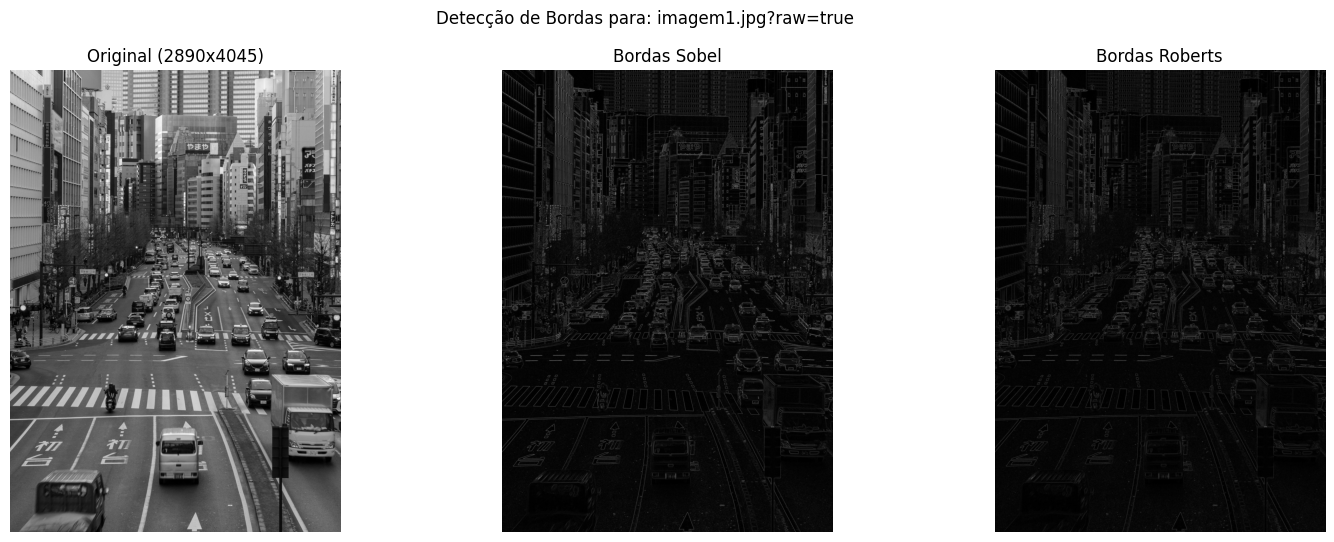


Processando https://github.com/Vinnie-IV/Processamento-de-Imagens_E01_Grupo04/blob/main/imagens/imagem2.jpg?raw=true...
===== Metadados da Imagem =====
Resolução: 5502 x 3668
Tamanho do arquivo: 15974268 bytes
Tipo de arquivo: .jpg?raw=true


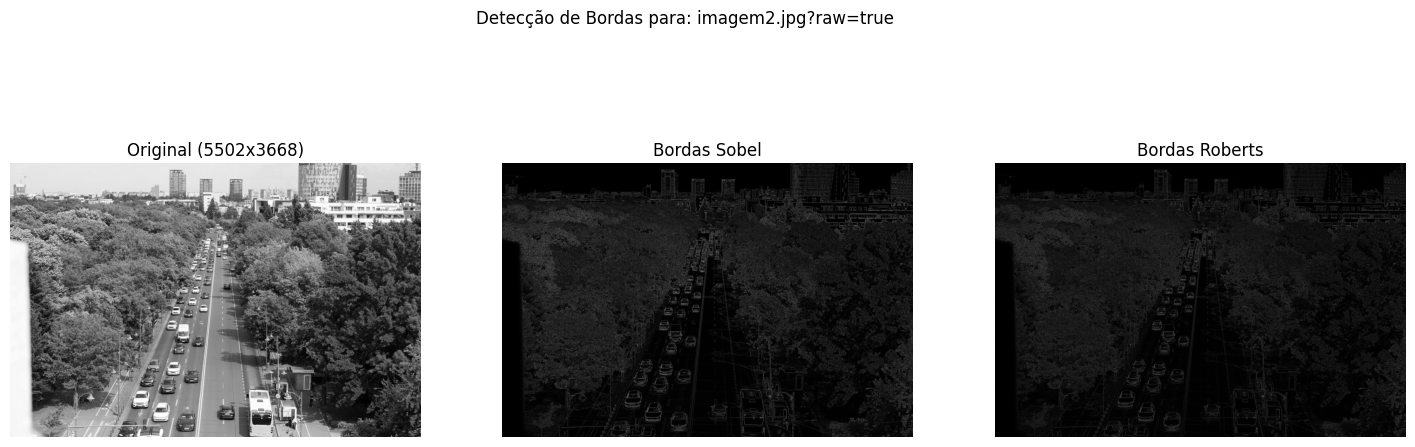


Processando https://github.com/Vinnie-IV/Processamento-de-Imagens_E01_Grupo04/blob/main/imagens/imagem3.jpeg?raw=true...
===== Metadados da Imagem =====
Resolução: 1024 x 679
Tamanho do arquivo: 296663 bytes
Tipo de arquivo: .jpeg?raw=true


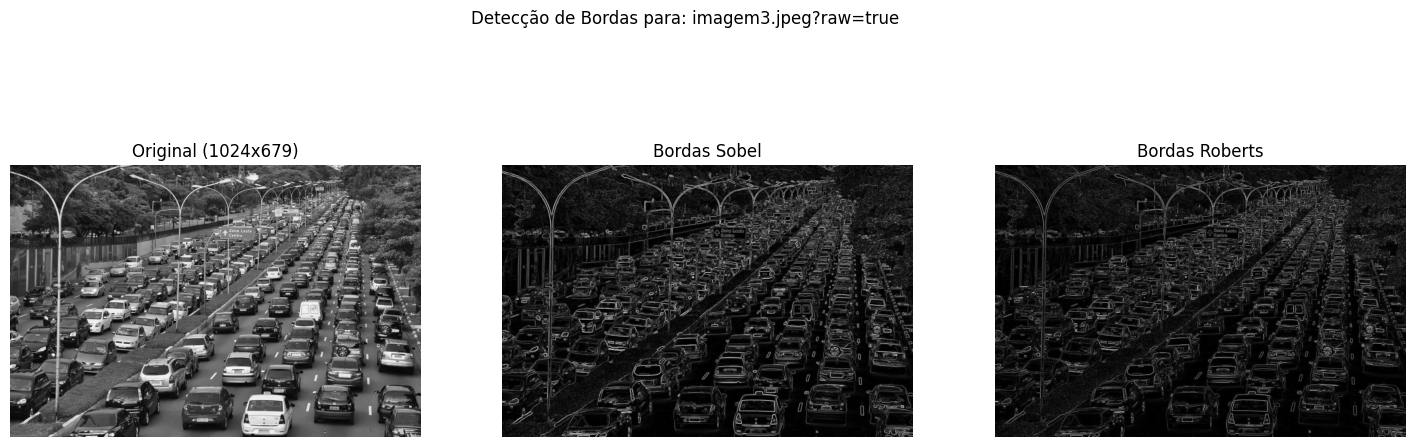

In [10]:
if __name__ == "__main__":
    imagens_github = [
        "https://github.com/Vinnie-IV/Processamento-de-Imagens_E01_Grupo04/blob/main/imagens/imagem1.jpg?raw=true",
        "https://github.com/Vinnie-IV/Processamento-de-Imagens_E01_Grupo04/blob/main/imagens/imagem2.jpg?raw=true",
        "https://github.com/Vinnie-IV/Processamento-de-Imagens_E01_Grupo04/blob/main/imagens/imagem3.jpeg?raw=true",
    ]

    for url in imagens_github:
        print(f"\nProcessando {url}...")
        img = carregar_imagem_github(url)

        if img is not None:
            exibir_metadados_github(url)

            img_processada = img

            sobel_img = borda_sobel(img_processada)
            roberts_img = borda_roberts(img_processada)

            fig, axes = plt.subplots(1, 3, figsize=(18, 6))
            ax = axes.ravel()

            ax[0].imshow(img_processada, cmap='gray')
            ax[0].set_title(f"Original ({img_processada.shape[1]}x{img_processada.shape[0]})")

            ax[1].imshow(sobel_img, cmap='gray')
            ax[1].set_title("Bordas Sobel")

            ax[2].imshow(roberts_img, cmap='gray')
            ax[2].set_title("Bordas Roberts")

            for a in ax:
                a.axis('off')

            plt.suptitle(f"Detecção de Bordas para: {url.split('/')[-1]}")
            plt.show()